### Portfolio Selection

#### Objective: 

The goal of this problem is to find the optimal portfolio of securities. 
An optimal portfolio is one that maximizes return on investment, while 
it mitigates the variance, thereby the risk. The two competing objectives - 
in **Risk** and **Return**, will formulate the problem as a multi-objective 
problem.


**The objective is defined as:**

\\begin{equation}
min \ {f_1(x),f_2(x)}
\\end{equation}

\\begin{equation}
such \ that \ x_1 + x_2 + x_3 + x_4  = 1
\\end{equation}

\\begin{equation}
subject \ to \  x_1,x_2,x_3,x_4 >= 0
\\end{equation}

\\begin{equation}
 \ f_1(x) =  0.5 x^T \sigma_c x_i
\\end{equation}

\\begin{equation}
 \ f_2(x) =  - \sum_1^n \mu_i x_i
\\end{equation}

- f1 the variance in the returns from the assets
- f2 the return from the assets
- $\mu_i$ is the Expected value of the security i and variance $\sigma_i$
- $\sigma_c$ is the covariance between assets i and j
- $x_1,x_2,x_3,x_4$ are the proportion of the investment in the portfolios - A,B,C,D
- We are going to maximize the returns while minimize the variance

#### Returns:
- Expected Return of Assets - A,B,C,D
- rit = (r1t, r2t, r3t, r4t)
- The quantities $\mu$ and $\sigma$ are determined from stock market data.

In [44]:
Return_table

,A,B,C,D
0,0.00630,0.00660,0.00107,0.02340
1,0.00150,0.00762,-0.06840,-0.07530
2,0.01861,-0.02480,0.02876,0.08761
3,0.03560,-0.05510,0.03200,0.03150
4,0.10110,0.01120,0.11810,0.10390
5,0.09110,0.00190,-0.01123,-0.10090
6,0.09810,0.78910,-0.00121,-0.01210
7,0.10090,0.09120,0.01231,0.09780
8,0.06700,0.07810,0.07910,0.07820
9,0.18190,0.09110,0.08120,0.10120


#### Further calculations: 
- The geometric mean for asset i is calculated as:
$ \mu_i $ is the geometric mean of all the assets i

\\begin{equation}
 \\pi_{i=1}^{10} ( 1+ r_ij )^{T^-1} - 1
\\end{equation}

- The covariance between the assets i and j is calculated as:

\\begin{equation}
 \ \sigma_c = (1/T) \sum_1^n ( r_it - r_i) ( r_jt - r_j)
\\end{equation}

- where rˆi and rˆj are the arithmetic mean of assets i and j.

#### The covariance matrix($\sigma_c$) results in:  

In [16]:
sigma_i_j

array([[ 0.00314014,  0.0041508 ,  0.00162361,  0.00143165],
       [ 0.0041508 ,  0.06109909, -0.00167029, -0.00245394],
       [ 0.00162361, -0.00167029,  0.00291397,  0.0031798 ],
       [ 0.00143165, -0.00245394,  0.0031798 ,  0.00563179]])

#### The geometric mean results in: 

In [14]:
geom_mu

[0.068908335389828101,
 0.080776084248156854,
 0.025892621885867273,
 0.03098611592954259]

By introducing $\alpha$ and $\beta$

\\begin{equation}
max \ f(x,y) =  {\alpha f_1(x,y) + \beta f_2(x,y)}
\\end{equation}

- The Pareto frontier is developed as a solution space by weighting the objectives
- The weights are assigned arbitrarily complimenting each other which sum up to 1
- Initially we proceed by equal weighting $\alpha$ = 0.5 and $\beta$ = 0.5

### Non-linear optimization: Using Exterior Penalty method

**Method Used:**

$$
\begin{align*}
    \psi(x,\rho_p) &= J(X) + \rho_p*P(X)\\
    P(X) &= {\sum_{j=1}^{n}max [0,g_j(X)]^2} + {\sum_{k=1}^{m_2} h_k(x)^2}\\
\end{align*}
$$


- if all constraints are satisfied, then **P(x)=0**
- **$ \rho_p $** = penalty parameter; starts as a small number and increases
- if **$ \rho_p $** is small, **$ \psi(x,\rho_p) $** is easy to minimize but yields large constraint violations
- if **$ \rho_p $** is large, constraints are all nearly satisfied but optimization problem is numerically ill-conditioned
- if optimization stops before convergence is reached, the design will be infeasible

**Penalty Function Used:**

$$
\begin{align*}
    \psi(x,\rho_p) &= J(X) + \rho_p*({\sum_{j=1}^{n} [g_j(X)]^2} + {\sum_{k=1}^{m_2} h_k(x)^2})\\
\end{align*}
$$

- **$g_j(X)$** contains those inequality constraints that are violated at x
- It can be shown that as $\rho_p->large$ $lim (x*(\rho_p))=x*$
- $\psi(x,\rho_p)$ is defined everywhere

**Algorithm Used:**

- choose $\rho_0$, set $k=10^0$
- find min $\psi(x,\rho_k)$ => $x_k*$
- if not converged, set $ 10^{k+1} $ > $ 10^{k} $ , k <- k+1 and repeat

**Implementation:**

In [64]:
import numpy as np
from sympy import *
import math
import scipy
import pandas as pd
import warnings
from ggplot import *
%matplotlib inline
warnings.filterwarnings("ignore")

#### Pre-process to compute geometric mean and covariance

In [65]:
Return_table  = pd.DataFrame()
Return_table['A'] = np.array([.0063,.0015,.01861,.0356,.1011,.0911,.0981,.1009,.0670,.1819])
Return_table['B'] = np.array([.0066,.00762,-.0248,-.0551,.0112,.0019,.7891,.0912,.0781,.0911])
Return_table['C'] = np.array([.00107,-.0684,.02876,.0320,.1181,-.01123,-.00121,.01231,.0791,.0812])
Return_table['D'] = np.array([.0234,-.0753,.08761,.0315,.1039,-.1009,-.0121,.0978,.0782,.1012])

def geom_mean():
    mu_A,mu_B,mu_C,mu_D = 1,1,1,1
    for i in range(len(Return_table)):
        mu_A *= (1+Return_table.loc[i,'A'])
        mu_B *= (1+Return_table.loc[i,'B'])
        mu_C *= (1+Return_table.loc[i,'C'])
        mu_D *= (1+Return_table.loc[i,'D'])
    return [mu_A**(.1) - 1,mu_B**.10 - 1,mu_C**.10 - 1,mu_D**.10 - 1]

geom_mu = geom_mean()
sigma_i_j = np.cov(np.array([Return_table['A'], Return_table['B'], Return_table['C'],Return_table['D']]))

#### Exterior Penalty method implementation

In [78]:
def function(w1,w2):
    x, y, z, w = symbols('x y z w',real=True)
    arr = np.matrix([[x],[y],[z],[w]])
    return (((arr.T) * sigma_i_j * arr)*w1 - (geom_mu * arr)*w2).item(0)

def constratints():
    x, y, z, w = symbols('x y z w',real=True)
    g1 = x + y + z + w - 1
    g2,g3,g4,g5 = x,y,z,w
    return g1,g2,g3,g4,g5

def penalized_function(mu,g1,g2,g3,g4,g5,w1,w2):
    return function(w1,w2) + mu * (g1**2) + mu*((g2**2) + (g3**2) + (g4**2) + (g5**2))

def non_linear_solve(mu,g1,g2,g3,g4,g5,starting_vector,w1,w2):
    return np.array(nsolve([diff(penalized_function(mu,g1,g2,g3,g4,g5,w1,w2),x),diff(penalized_function(mu,g1,g2,g3,g4,g5,w1,w2),y),diff(penalized_function(mu,g1,g2,g3,g4,g5,w1,w2),z),diff(penalized_function(mu,g1,g2,g3,g4,g5,w1,w2),w)],[x,y,z,w],starting_vector))
   
def check_for_constraints(a):
    idx = np.array([])
    for i in range(len(a)):
        if a[i] < 0.: 
            idx = np.append(idx,1)
        else: 
            idx = np.append(idx,0)
    return idx

In [88]:
def exterior_penalty(w1,w2):
    x, y, z, w = symbols('x y z w',real=True)
    starting_vector = [1 for _ in range(4)]
    g1,g2,g3,g4,g5 = constratints()

    # penalize everything to get the initial vector
    soln0 = non_linear_solve(1,g1,g2,g3,g4,g5,starting_vector,w1,w2)
    function_value = function(w1,w2).subs({x:soln0[0],y:soln0[1],z:soln0[2],w:soln0[3]})

    itr = 13
    for k in range(itr):
        idx = check_for_constraints(soln0)
        soln = non_linear_solve(10**k,g1,g2*idx[0],g3*idx[1],g4*idx[2],g5*idx[3],starting_vector,w1,w2)
        function_value = function(w1,w2).subs({x:soln[0],y:soln[1],z:soln[2],w:soln[3]})
        print 'iteration',k,'Mu: ',10**k,'x1 x2 x3 x4 = ',round(soln[0],3),round(soln[1],3),round(soln[2],3),round(soln[3],3),'f(x1,x2): ',round(function_value,9)
        soln0 = soln  
        if abs((g1.subs({x:soln[0],y:soln[1],z:soln[2],w:soln[3]}))) < 10**(-17):
            break
    print "Converged Successfully in iterations: ",k

In [86]:
exterior_penalty(0.5,0.5)

iteration 0 Mu:  1 x1 x2 x3 x4 =  9.932 -0.528 -11.263 2.868 f(x1,x2):  -0.119667831
iteration 1 Mu:  10 x1 x2 x3 x4 =  3.922 -0.0 -0.001 -2.92 f(x1,x2):  -0.058116574
iteration 2 Mu:  100 x1 x2 x3 x4 =  1.0 0.0 -0.0 -0.0 f(x1,x2):  -0.032892609
iteration 3 Mu:  1000 x1 x2 x3 x4 =  0.912 0.088 -0.0 -0.0 f(x1,x2):  -0.033101573
iteration 4 Mu:  10000 x1 x2 x3 x4 =  0.912 0.088 -0.0 -0.0 f(x1,x2):  -0.033100834
iteration 5 Mu:  100000 x1 x2 x3 x4 =  0.912 0.088 -0.0 -0.0 f(x1,x2):  -0.03310076
iteration 6 Mu:  1000000 x1 x2 x3 x4 =  0.912 0.088 -0.0 -0.0 f(x1,x2):  -0.033100752
iteration 7 Mu:  10000000 x1 x2 x3 x4 =  0.912 0.088 -0.0 -0.0 f(x1,x2):  -0.033100752
iteration 8 Mu:  100000000 x1 x2 x3 x4 =  0.912 0.088 -0.0 -0.0 f(x1,x2):  -0.033100751
iteration 9 Mu:  1000000000 x1 x2 x3 x4 =  0.912 0.088 -0.0 -0.0 f(x1,x2):  -0.033100751
iteration 10 Mu:  10000000000 x1 x2 x3 x4 =  0.914 0.086 -0.0 -0.0 f(x1,x2):  -0.033100646
iteration 11 Mu:  100000000000 x1 x2 x3 x4 =  0.911 0.089 -0.0

#### Results:
- The converging function value is **-0.032927723**
- Using the initial value as Mu = 10^0 = 1 final solution of x is **[ 0.833 0.167 -0.0 -0.0]**
- The algorithm converged in **12 iterations** using the above mu values and tolerance of **10^-8** in constraints

The investment strategy would be:

For equal weights of risk and return $\alpha$ = 0.5 and $\beta$ = 0.5
- X1 = 83.33%
- X2 = 16.7%
- X3 = 00.00%
- X4 = 00.00%

The **Risk** & **Return**:

In [125]:
function1(1.,0.).subs({x:0.833,y:0.167,z:0.,w:0.})

0.00503774215370480

The **Risk** = 0.0050377

In [61]:
function1(0.,1.).subs({x:0.833,y:0.167,z:0.,w:0.})

-0.0708902494491690

The **Return** = -0.070890

#### Additional Comments:

- Convergence criteria is: 20 maximum iterations or **constraints satisfied**
- Allowing for tolerance in the constraints around **10^-8**, the iterations are further increased
- Mu values in **12 iterations** increase to the powers of 10.
- The computed values are cross-validated by checking plugging in these values given by the criteria defined above and checking for constraints.

### Pareto Frontier: using random uniform weights

#### Approach:

- We are going to vary $\alpha$ and $\beta$ by generating **random uniform** numbers between 0 and 1 such that $\alpha$ + $\beta$ = 1
- For each combination of $\alpha$ and $\beta$, we shall compute the **Return** and **Risk**, by generating the **solution space** for the investment strategy

#### Implementation:

In [ ]:
import random
x, y=symbols('x y',real=True)

def exterior_penalty_test(w1,w2):
    x, y, z, w = symbols('x y z w',real=True)
    starting_vector = [1 for _ in range(4)]
    g1,g2,g3,g4,g5 = constratints()
    soln0 = non_linear_solve(1,g1,g2,g3,g4,g5,starting_vector,w1,w2)
    function_value = function(w1,w2).subs({x:soln0[0],y:soln0[1],z:soln0[2],w:soln0[3]})
    itr = 20
    for k in range(itr):
        idx = check_for_constraints(soln0)
        soln = non_linear_solve(10**k,g1,g2*idx[0],g3*idx[1],g4*idx[2],g5*idx[3],starting_vector,w1,w2)
        function_value = function(w1,w2).subs({x:soln[0],y:soln[1],z:soln[2],w:soln[3]})
        soln0 = soln  
        if abs((g1.subs({x:soln[0],y:soln[1],z:soln[2],w:soln[3]}))) < 10**(-8):
            break
    # x1,x2,x3,x4,risk,return,objective
    return round(soln[0],2),round(soln[1],2),round(soln[2],2),round(soln[3],2),round(function(1.,0.).subs({x:soln[0],y:soln[1],z:soln[2],w:soln[3]}),4),round(function(0.,1.).subs({x:soln[0],y:soln[1],z:soln[2],w:soln[3]}),4),round(function(w1,w2).subs({x:soln[0],y:soln[1],z:soln[2],w:soln[3]}),4)

#### Simulaiton - for 10 trials of random uniform weights:

In [121]:
def simulation(trials):
    result = pd.DataFrame()
    for i in range(trials):
    # compute the random uniform weights    
        w1 = random.uniform(0,1)
        w2 = 1.0 - w1
        x1,x2,x3,x4,risk,retu,objective =  exterior_penalty_test(w1,w2)
        result.loc[i,'Risk weight(alpha)'],result.loc[i,'Return weight(beta)'] = round(w1*100,0),round(w2*100,0)
        result.loc[i,'x1'],result.loc[i,'x2'],result.loc[i,'x3'] = x1,x2,x3
        result.loc[i,'x4'] = x4
        result.loc[i,'Risk'] = risk
        result.loc[i,'Return'] = retu
        result.loc[i,'Objective'] = objective
    return result

In [122]:
result = simulation(10)
result

,Risk weight(alpha),Return weight(beta),x1,x2,x3,x4,Risk,Return,Objective
0,69,31,0.97,0.03,-0,-0.00,0.0033,-0.0693,-0.0195
1,58,42,0.94,0.06,-0,-0.00,0.0035,-0.0696,-0.0275
2,35,65,0.82,0.18,-0,-0.00,0.0054,-0.0711,-0.0447
3,32,68,0.79,0.21,-0,-0.00,0.0061,-0.0714,-0.0470
4,44,56,0.88,0.12,-0,-0.00,0.0042,-0.0703,-0.0378
5,94,6,0.93,-0.00,-0,0.07,0.0029,-0.0662,-0.0014
6,66,34,0.96,0.04,-0,-0.00,0.0033,-0.0693,-0.0215
7,39,61,0.85,0.15,-0,-0.00,0.0047,-0.0707,-0.0414
8,42,58,0.87,0.13,-0,-0.00,0.0043,-0.0704,-0.0390
9,24,76,0.68,0.32,-0,-0.00,0.0096,-0.0727,-0.0531


In [133]:
df = simulation(100)

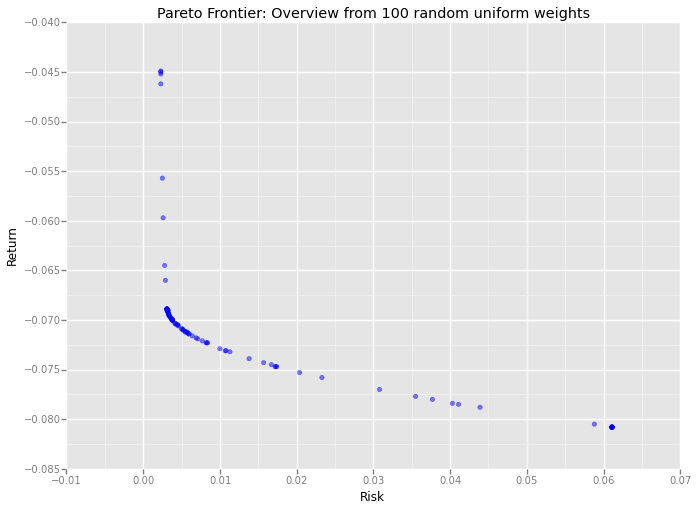

<ggplot: (290540997)>

In [140]:
ggplot(aes(x='Risk', y='Return'), data=df) +\
    geom_point(color = 'blue',alpha = 0.5) +\
    ggtitle("Pareto Frontier: Overview from 100 random uniform weights") + \
    stat_smooth(colour='blue',span = 0.0) 

### Results:

- As expected, we could see the curve for Risk vs Return curve steepest at high returns during minimum risk (inverse realtion)
- The returns decrease slowly, while the risk moves increases